<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/Naver_shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 쇼핑몰 리뷰데이터

## 데이터 가져오기

In [15]:
 ## !python -m pip install konlpy

오픈 api 사용할 때 쓰는 것 : curl

In [16]:
 ## !curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

리눅스 파일 확장자 : .sh(shell)


In [17]:
##  !bash ./mecab.sh

In [19]:
## !curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

## 다운받은 데이터 판다스로 불러오기

In [5]:
import pandas as pd

In [6]:
total_data = pd.read_table('./naver_shopping.txt', names=['ratings','reviews'])

In [7]:
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


### [Drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)(동일하게) 되있는 부분을 없애기

```
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
 ```
 와 

 len(total_data) 199908 
 
 비교해보니 다른게 있는 것을 알 수 있었다. 

In [9]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

### split

In [10]:
from sklearn.model_selection import train_test_split

전처리

In [11]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [22]:
x_train ,x_test,y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

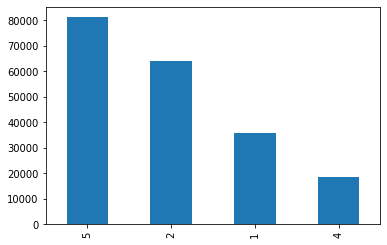

In [12]:
y_data.value_counts().plot(kind='bar')

데이터가 쏠려있을 때 평준화 시켜줘야 한다

(많은건 삭제:과소표집, 적은건 증가 시킴:과대표집)

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)



In [23]:
type(x_train)

pandas.core.series.Series

## NLP : 테스트 전처리

[regular expression](https://regexr.com/)불용어 처리 간단히 하는 방법

한글만 가져올 때 

가나다 순으로 [^가-힣] 모두 가져올 수 있음 

가나다 순으로 [^가-두] 사이는 모두 가져올 수 있음

[^가-힣ㄱ-ㅎㅠ ]이런식으로 추가해서 가져오면 됨

한글과 영어 같이 가져올때 [^가-두a-l]


In [ ]:
x_temp = x_train
x_temp.str.replace('[가-힣ㄱ-ㅎㅠ ]','')

In [ ]:
x_temp01= x_train
x_temp01.str.replace('[^가-힣ㄱ-휴 ]','')

In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','') # [a-zA-Z ]

In [27]:
from konlpy.tag import Mecab

In [28]:
mecab = Mecab()

In [29]:
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [30]:
x_train_small = x_train[0:5000]

In [ ]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)

  sentance.append([item for item in encoded if item not in stopwords])

sentance   

## Tokenizer

In [ ]:
print(sentance)

In [37]:
import tensorflow as tf

In [38]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [39]:
tokenizer.fit_on_texts(sentance)

In [ ]:
 tokenizer.word_index

우리가 만든 사전의 단어가 전체문장에 몇번 들어갔는지 카운팅 되어 나옴

In [ ]:
 tokenizer.word_counts

전체카운팅에서 낮은 애들 걸러내기

카운트 2이하인 것들만 뽑아내서 전체에서 빼면 총 몇퍼센트 인지 확인가능하다

In [42]:
total_cnt = len(tokenizer.word_index)

In [43]:
rare_cnt = 0
total_freq,rare_freq = 0,0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value #전체 단어의 수
  if(value <=2):
    rare_cnt = rare_cnt+ 1  
    rare_freq = rare_freq + value #2미만인 단어(희귀단어)의 수

In [44]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8075, 5299, 65.62229102167183, 7.711242603550296)

In [45]:
vocab_size = total_cnt - rare_cnt #보케블러리 사이즈

oov(Out Of Vocablary)

In [46]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [47]:
tokenizer.fit_on_texts(sentance)

In [ ]:
 tokenizer.index_word

## 숫자화

텍스트 시퀀스 

In [49]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [50]:
len(x_train_small[0]),len(x_train_small[40]),len(x_train_small[50])

(27, 8, 7)

평균적인 사이즈 확인

In [51]:
hist_len = [len(words) for words in x_train_small]

In [52]:
import matplotlib.pyplot as plt

(array([ 17.,  53., 392., 359., 346., 612., 247., 253., 355., 152., 147.,
        269.,  93.,  98., 203.,  97.,  91., 179.,  75.,  64., 132.,  53.,
         56.,  88.,  41.,  45.,  84.,  24.,  42.,  43.,  28.,  32.,  44.,
         17.,  22.,  37.,  22.,  14.,  18.,  14.,   9.,  17.,   1.,   5.,
          7.,   1.,   0.,   1.,   0.,   1.]),
 array([ 1.  ,  2.34,  3.68,  5.02,  6.36,  7.7 ,  9.04, 10.38, 11.72,
        13.06, 14.4 , 15.74, 17.08, 18.42, 19.76, 21.1 , 22.44, 23.78,
        25.12, 26.46, 27.8 , 29.14, 30.48, 31.82, 33.16, 34.5 , 35.84,
        37.18, 38.52, 39.86, 41.2 , 42.54, 43.88, 45.22, 46.56, 47.9 ,
        49.24, 50.58, 51.92, 53.26, 54.6 , 55.94, 57.28, 58.62, 59.96,
        61.3 , 62.64, 63.98, 65.32, 66.66, 68.  ]),
 <a list of 50 Patch objects>)

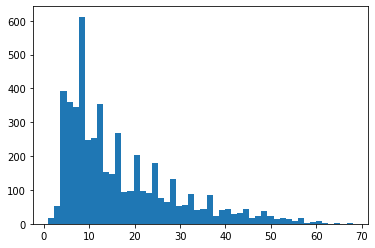

In [53]:
plt.hist(hist_len, bins=50)

pad를 몇정도 하면 좋을지 확인

In [54]:
sum(hist_len)/ len(x_train_small)

16.9

50정도로 pad채워주기로함

In [55]:
x_train_small =tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [56]:
x_train_small

array([[   0,    0,    0, ...,  121,  101,   93],
       [   0,    0,    0, ...,  169,   75,   36],
       [   0,    0,    0, ..., 1536,   27,    7],
       ...,
       [   0,    0,    0, ...,   49,   71,    5],
       [   0,    0,    0, ...,   42,  254,    5],
       [   0,    0,    0, ...,   26,   47,   12]], dtype=int32)

모든 데이터가 너무많아서 5000개만 뽑아서 스몰로 해줌

In [57]:
y_train_small = y_train[0:5000]

전체 y_train_small 값에서 -1 해주기

카테고리가 원핫인코딩 되도 0으로 시작해도 본래 모습으로 쓸수 있기 때문에 

In [58]:
import numpy as np

np.unique(y_train_small) # 원래는 별점이 5개, 의견은 데이터 기준이어서 3이빠졋으니 덴스 5개

array([1, 2, 4, 5])

In [59]:
y_train_small = np.array(y_train_small)-1

In [60]:
np.unique(y_train_small) # 맥스4 기준으로 4,3,2,1,0써줘서  덴스 5개

array([0, 1, 3, 4])

In [61]:
len(x_train_small), len(y_train_small)

(5000, 5000)

## Model

In [85]:
model = tf.keras.models.Sequential()

스파스 카테고리칼 크로스엔트로피는 내부에서 자동으로 y의 값이 1,2,3,4 이런식으로 숫자로 들어오면 원핫인코딩으로 바꿔줌. (분류형)

내부적으로 원핫인코딩으로 바꿔질때 규칙이 있다.
y에 나열된 값이 0부터 시작되고 맥시멀값을 쫒는다.
```
np.unique(y_train_small)

array([1, 2, 4, 5])
```

이경우 그래서 6개가 된다.(0,1,2,3,4,5)
-> 덴스 6

In [86]:
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim =30 ,input_length=50))
# model.add(tf.keras.layers.LSTM(128))
# model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(5,activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

성능 높이는 방법 1: 노드 바꿔주기

```
 model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
 ```

성능 높이는 방법 2: LSTM 기능 보강
```
model.add(tf.keras.layers.GRU(128))
```

In [87]:
hist = model.fit(x_train_small, y_train_small, epochs=50, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/50
14/14 [==============================] - 10s 522ms/step - loss: 1.4454 - acc: 0.4097 - val_loss: 1.2996 - val_acc: 0.4200
Epoch 2/50
14/14 [==============================] - 7s 470ms/step - loss: 1.2636 - acc: 0.4420 - val_loss: 1.2487 - val_acc: 0.4000
Epoch 3/50
14/14 [==============================] - 7s 470ms/step - loss: 1.2126 - acc: 0.4880 - val_loss: 1.2102 - val_acc: 0.4553
Epoch 4/50
14/14 [==============================] - 7s 468ms/step - loss: 1.1179 - acc: 0.5446 - val_loss: 1.1770 - val_acc: 0.4880
Epoch 5/50
14/14 [==============================] - 7s 468ms/step - loss: 1.0015 - acc: 0.6103 - val_loss: 1.0858 - val_acc: 0.5387
Epoch 6/50
14/14 [==============================] - 6s 465ms/step - loss: 1.0309 - acc: 0.5966 - val_loss: 1.0755 - val_acc: 0.5933
Epoch 7/50
14/14 [==============================] - 6s 461ms/step - loss: 0.9410 - acc: 0.6423 - val_loss: 1.0041 - val_acc: 0.5747
Epoch 8/50
14/14 [==============================] - 6s 456ms/step - loss: 0

In [76]:
model.evaluate(x_train_small, y_train_small) # LSTM(128) loss: 1.2520 - acc: 0.4249

157/157 [==============================] - 2s 11ms/step - loss: 1.2526 - acc: 0.4162


[1.2525545358657837, 0.41620001196861267]

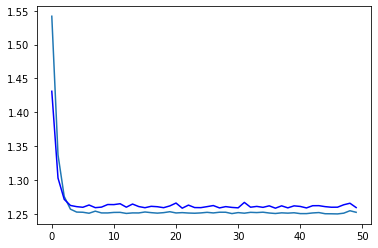

In [77]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

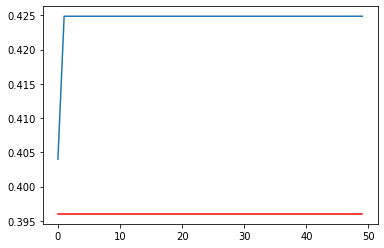

In [78]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [82]:
model.evaluate(x_train_small, y_train_small) # GRU(128) loss: 0.0688 - acc: 0.9823

157/157 [==============================] - 1s 9ms/step - loss: 1.0724 - acc: 0.8350


[1.0723692178726196, 0.8349999785423279]

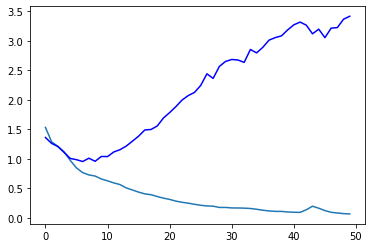

In [83]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

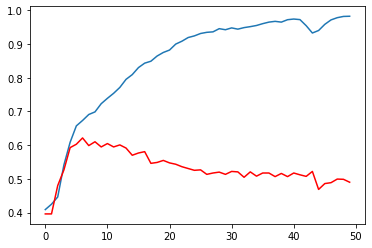

In [84]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [88]:
model.evaluate(x_train_small, y_train_small) # Bidirectinal(LSTM(128)) loss: 0.1749 - acc: 0.9477

157/157 [==============================] - 3s 17ms/step - loss: 1.0151 - acc: 0.8144


[1.0151063203811646, 0.8144000172615051]

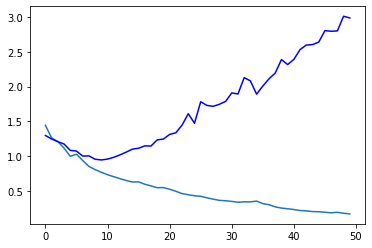

In [89]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

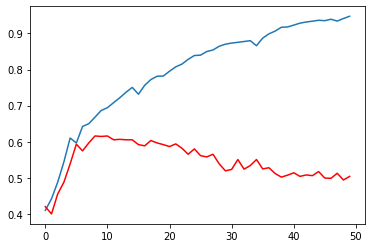

In [90]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()